### **Overview**

This notebooks is designed to explore the graph structure of the Data Archive. 

1. **Data Loading**: We load the graph using JSON file containing metadata about notes.
2. **Node Exploration**:
3. ** Edge Exploration**:

### TOC

- [1. Data Loading](#1-data-loading)


### 1. Data Loading

In [1]:
import json
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import numpy as np
import matplotlib.cm as cm

import sys
import os

# Add the 'src' directory to the system path so it can be imported
project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))
src_path = os.path.join(project_root, "src")
sys.path.append(src_path)

# Now you can import from the 'my_package' inside 'src'
import my_package.graphing as g


### Load the graph structure

In [2]:
OUTPUT_PATH="../Data/vault_index.json"
# # read json file
with open(OUTPUT_PATH, "r", encoding="utf-8") as f:
    vault_index = json.load(f)

In [3]:
# Create the directed graph
def create_graph(vault_index):
    G = nx.DiGraph()

    # Add nodes and their properties
    for node_id, data in vault_index.items():
        G.add_node(node_id, **data)

    # Add edges based on inlinks
    for target_id, data in vault_index.items():
        for source_id in data["inlinks"]:
            if source_id in vault_index:  # Only create edge if source node exists
                G.add_edge(source_id, target_id)

    # Add edges based on outlinks
    for source_id, data in vault_index.items():
        for target_id in data["outlinks"]:
            if target_id in vault_index:  # Only create edge if target node exists
                G.add_edge(source_id, target_id)
    return G

In [4]:
G=create_graph(vault_index)

Subgraph has 7 nodes and 11 edges


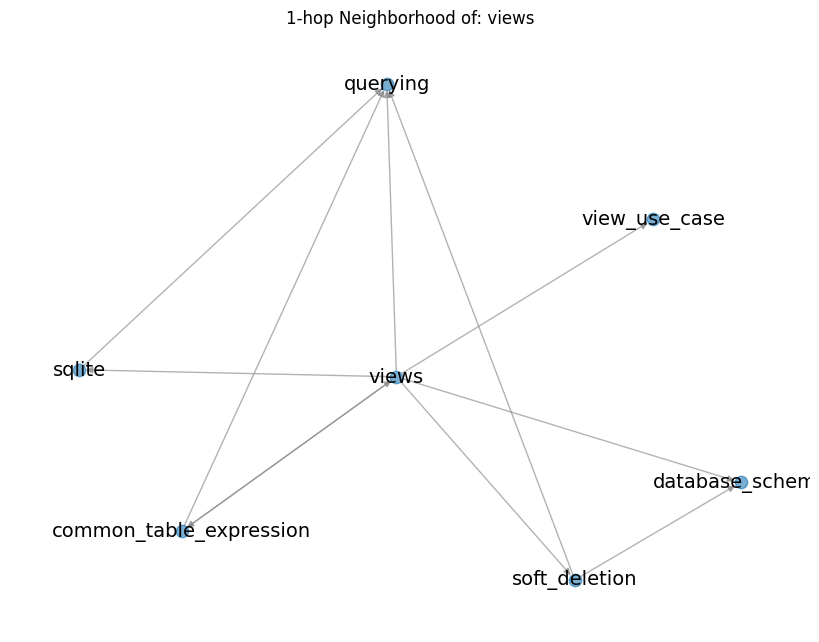

In [5]:
# Example: a 1-hop neighborhood
subG = g.get_subgraph(G,"views", depth=1,remove_loops=True)
g.plot_graph(subG, label_nodes=True,center_title="views", font_size=14, k=2)  # Font size set to 14 and reduced edge length with k=0.1

## Nodes

In [3]:
# Retrieve attributes of a specific node
node_id = "views"
if node_id in G.nodes:
    props = G.nodes[node_id]
    print(f"Properties of node '{node_id}':")
    for key, value in props.items():
        print(f"  {key}: {value}")
else:
    print(f"Node '{node_id}' not found in graph.")

Properties of node 'views':
  title: Views
  tags: ['database']
  aliases: []
  outlinks: ['de_tools', 'sqlite', 'querying', 'common_table_expression', 'view_use_case', 'soft_deletion', 'database_schema']
  inlinks: ['common_table_expression']
  summary: Views are virtual tables defined by SQL [[Querying|Query]] that ==simplify complex data representation.== They can remove unnecessary columns, aggregate results, partition data, and secure sensitive...


In [7]:
# ---------------------------
# Node-Level Analysis
# ---------------------------

print("\n--- NODE SUMMARY ---")
print(f"Total number of nodes: {G.number_of_nodes()}")
print("Top node properties (keys):", list(next(iter(vault_index.values())).keys()))


--- NODE SUMMARY ---
Total number of nodes: 796
Top node properties (keys): ['title', 'tags', 'aliases', 'outlinks', 'inlinks', 'summary']


In [8]:
# Degree metrics
node_degrees = {
    node: {
        "in_degree": G.in_degree(node),
        "out_degree": G.out_degree(node),
        "total_degree": G.degree(node)
    }
    for node in G.nodes
}

print("\nSample node degrees:")
for node, deg in list(node_degrees.items())[:5]:
    print(f"{node}: {deg}")


Sample node degrees:
1-on-1_template: {'in_degree': 1, 'out_degree': 0, 'total_degree': 1}
ab_testing: {'in_degree': 0, 'out_degree': 0, 'total_degree': 0}
accessing_gen_ai_generated_content: {'in_degree': 0, 'out_degree': 5, 'total_degree': 5}
accuracy: {'in_degree': 9, 'out_degree': 3, 'total_degree': 12}
acid_transaction: {'in_degree': 3, 'out_degree': 1, 'total_degree': 4}


## Edges

In [9]:
# ---------------------------
# Edge-Level Analysis
# ---------------------------

print("\n--- EDGE SUMMARY ---")
print(f"Total number of edges: {G.number_of_edges()}")

# Check if edges are bidirectional
reciprocal_edges = [(u, v) for u, v in G.edges if G.has_edge(v, u)]
print(f"Number of reciprocal edge pairs: {len(reciprocal_edges)}")


--- EDGE SUMMARY ---
Total number of edges: 2159
Number of reciprocal edge pairs: 442


In [10]:
# ---------------------------
# Visualisation (Optional)
# ---------------------------

def draw_graph(G):
    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=10)
    plt.title("Graph View")
    plt.show()

# draw_graph(G)  # Uncomment to display the graph

In [74]:
# ---------------------------
# Centrality & Influence
# ---------------------------

print("\n--- CENTRALITY MEASURES ---")
degree_centrality = nx.degree_centrality(G)
betweenness = nx.betweenness_centrality(G)
pagerank = nx.pagerank(G)


--- CENTRALITY MEASURES ---


In [71]:
print("Sample centralities (top 3 nodes by PageRank):")
for node in sorted(pagerank, key=pagerank.get, reverse=True)[:5]:
    print(f"{node}: PageRank={pagerank[node]:.4f}, Betweenness={betweenness[node]:.4f}")

Sample centralities (top 3 nodes by PageRank):
dendrograms: PageRank=0.0110, Betweenness=0.0000
classification: PageRank=0.0091, Betweenness=0.0243
gradient_descent: PageRank=0.0083, Betweenness=0.0108
interpretability: PageRank=0.0081, Betweenness=0.0000
clustering: PageRank=0.0076, Betweenness=0.0358


In [12]:
# ---------------------------
# Summary: Isolated or Weakly Connected Nodes
# ---------------------------

isolated_nodes = list(nx.isolates(G))
print(f"\nNumber of isolated nodes: {len(isolated_nodes)}")
if isolated_nodes:
    print("Example isolated nodes:", isolated_nodes[:3])


Number of isolated nodes: 62
Example isolated nodes: ['ab_testing', 'attention_is_all_you_need', 'binder']


# Explorations

In [ ]:
## Explorations 5: Tag Subgraph Analysis

In [ ]:
Determine the:
- connected components
- Degree centrality
- Betweenness centrality
- Closeness centrality
- PageRank (if applicable)


## Exploration 3

### A. **Connectivity & Components**
- Is the graph fully connected?
- Number of connected components
- Identify isolated nodes

### B. **Centrality Measures**
- Degree centrality
- Betweenness centrality
- Closeness centrality
- PageRank (if applicable)


## **Step 4: Relationship Patterns**
- **Influence**: how central a node is to the overall connectivity
- **Information flow**: how easily data or influence can move

## Exploaration 4: Tag Subgraph Viewing

In [21]:
def create_filtered_graph(G, target_tag):
    """
    Filters nodes based on the given tag and creates a subgraph.

    Parameters:
        G (networkx.Graph): The graph to filter and create the subgraph from.
        target_tag (str): The tag to filter nodes by.

    Returns:
        networkx.Graph: The filtered subgraph.
    """
    # Filter nodes that contain the tag (robustly handle None or non-list tags)
    tagged_nodes = [
        n for n, attr in G.nodes(data=True)
        if isinstance(attr.get("tags", []), list) and target_tag in attr.get("tags", [])]

    # Create subgraph from matching nodes
    subG = G.subgraph(tagged_nodes).copy()
    return subG

# Example usage (assuming G and target_tag are already defined)
target_tag = "evaluation"
# target_tag = "classifier"
subG = create_filtered_graph(G, target_tag)

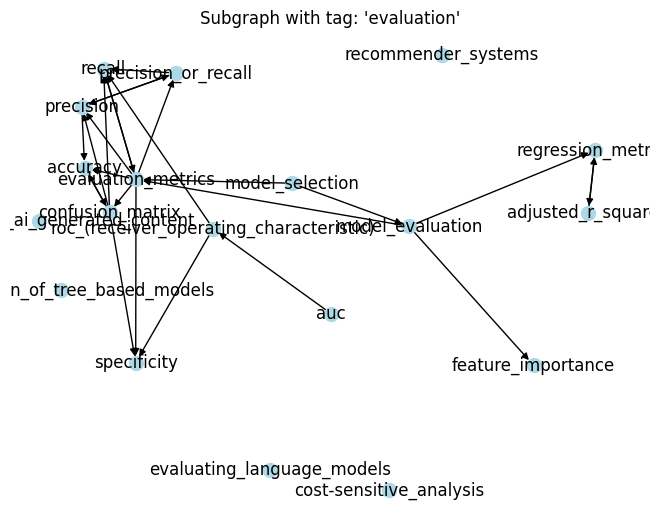

In [22]:
def plot_subgraph_matplotlib(subG, target_tag):
    # Adjust k to control the spread of the nodes
    pos = nx.spring_layout(subG, seed=42, k=0.7)  # Increase k to spread out nodes
    nx.draw(subG, pos, with_labels=True, node_color="lightblue", node_size=100)
    plt.title(f"Subgraph with tag: '{target_tag}'")
    plt.axis("off")
    plt.show()

# Example usage (assuming subG and target_tag are already defined)
plot_subgraph_matplotlib(subG, target_tag)

In [35]:
import networkx as nx
import plotly.graph_objects as go

def plot_graph(G,attributes):
    """
    Plots the graph using Plotly, with edges as disconnected lines and nodes as markers.
    Shows node names and properties when hovering over them.

    Parameters:
        G (networkx.Graph): The graph to visualize.
    """
    # Create Edges
    edge_x = []
    edge_y = []
    for edge in G.edges():
        # Get the position of nodes, assign default if 'pos' is missing
        pos_0 = G.nodes[edge[0]].get('pos', (None, None))
        pos_1 = G.nodes[edge[1]].get('pos', (None, None))
        
        x0, y0 = pos_0
        x1, y1 = pos_1
        
        if None in pos_0 or None in pos_1:  # If position is missing, skip the edge
            continue
            
        edge_x.append(x0)
        edge_x.append(x1)
        edge_x.append(None)
        edge_y.append(y0)
        edge_y.append(y1)
        edge_y.append(None)

    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=0.5, color='#888'),
        hoverinfo='none',
        mode='lines')

    # Create Nodes
    node_x = []
    node_y = []
    node_text = []  # To store the node's hover text
    node_text = []
    for node in G.nodes():
        pos = G.nodes[node].get('pos', (None, None))

        if None in pos:
            continue

        x, y = pos
        node_x.append(x)
        node_y.append(y)

        # Extract only selected fields
        node_data = G.nodes[node]
        selected_keys = attributes
        
        # Format properties neatly
        properties_text = "<br>".join(
            f"<b>{k}:</b> {node_data.get(k)}"
            for k in selected_keys if k in node_data
        )
        
        node_hover_text = f"<b>ID:</b> {node}<br>{properties_text}"
        node_text.append(node_hover_text)

    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers',
        hoverinfo='text',
        marker=dict(
            showscale=True,
            colorscale='YlGnBu',
            reversescale=True,
            color=[],
            size=10,
            colorbar=dict(
                thickness=15,
                title=dict(
                    text='Node Connections',
                    side='right'
                ),
                xanchor='left',
            ),
            line_width=2))

    # Color Nodes by number of connections
    node_adjacencies = []
    for node, adjacencies in enumerate(G.adjacency()):
        node_adjacencies.append(len(adjacencies[1]))

    node_trace.marker.color = node_adjacencies
    node_trace.text = node_text  # Set the hover text

    # Create Network Graph Figure
    fig = go.Figure(data=[edge_trace, node_trace],
                    layout=go.Layout(
                        title=dict(
                            text="<br>Network graph made with Python",
                            font=dict(size=16)
                        ),
                        showlegend=False,
                        hovermode='closest',
                        margin=dict(b=20, l=5, r=5, t=40),
                        annotations=[dict(
                            text="",
                            showarrow=False,
                            xref="paper", yref="paper",
                            x=0.005, y=-0.002)],
                        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
                    ))

    fig.show()


In [36]:
# Generate positions for each node using spring layout (you can try other layouts like 'circular_layout' or 'spectral_layout')
pos = nx.spring_layout(subG, seed=42)  # You can also use other layout algorithms

# Assign the positions to each node
for node, p in pos.items():
    subG.nodes[node]['pos'] = p

# Now you can call plot_graph to visualize the graph
# plot_graph(subG,attrinutes=['title', 'tags','inlinks','outlinks'])
plot_graph(subG,attributes=['title', 'tags'])

## Exploration 3: Shortest Paths Between Nodes

Given two nodes in the graph, find the shortest path(s) between them and plot.

In [67]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

def find_all_shortest_paths(graph, source_node, target_node, weight=None):
    """
    Finds all shortest paths between two nodes.

    Parameters:
        graph: A networkx graph (directed or undirected)
        source_node: Node name or ID to start from
        target_node: Node name or ID to reach
        weight: Optional, edge weight attribute (only used with Dijkstra)

    Returns:
        A list of paths (each path is a list of nodes)
    """
    try:
        if weight:
            # No built-in support for all weighted shortest paths, raise error for now
            raise NotImplementedError("All weighted shortest paths not supported by networkx.")
        paths = list(nx.all_shortest_paths(graph, source=source_node, target=target_node))
        return paths
    except nx.NetworkXNoPath:
        print(f"No path found between {source_node} and {target_node}.")
        return []
    except nx.NodeNotFound as e:
        print(str(e))
        return []

def draw_path(graph, path, title="Shortest Path"):
    """
    Draws a single path in a graph.

    Parameters:
        graph: The networkx graph
        path: A list of nodes forming a path
        title: Title for the plot
    """
    subgraph = graph.subgraph(path)
    pos = nx.spring_layout(subgraph, seed=42)

    plt.figure(figsize=(8, 5))
    nx.draw(subgraph, pos, with_labels=True, node_color="lightgreen", node_size=600)
    nx.draw_networkx_edges(subgraph, pos, edge_color='gray')
    plt.title(title)
    plt.axis("off")
    plt.show()


def draw_all_paths(graph, paths):
    """
    Draws all shortest paths on the same graph with different colors.

    Parameters:
        graph: The networkx graph
        paths: List of paths (each path is a list of nodes)
    """
    # Flatten all nodes in all paths
    nodes_in_paths = set(n for path in paths for n in path)
    subgraph = graph.subgraph(nodes_in_paths)

    # Use consistent layout
    pos = nx.spring_layout(subgraph, seed=42)

    # Draw base graph in light gray
    nx.draw_networkx_nodes(subgraph, pos, node_color="lightgray", node_size=500)
    nx.draw_networkx_edges(subgraph, pos, edge_color='lightgray')
    nx.draw_networkx_labels(subgraph, pos)

    # Use modern colormap handling
    cmap = plt.colormaps.get_cmap('tab10')

    # Collect legend handles
    legend_handles = []

    for i, path in enumerate(paths):
        color = cmap(i % cmap.N)  # cycle if more paths than colors
        path_edges = list(zip(path[:-1], path[1:]))

        nx.draw_networkx_edges(graph, pos, edgelist=path_edges, width=3, edge_color=[color])
        nx.draw_networkx_nodes(graph, pos, nodelist=path, node_color=[color], node_size=600, alpha=0.7)

        # Add to legend
        legend_handles.append(mpatches.Patch(color=color, label=f"Path {i+1}"))

    plt.title("All Shortest Paths (Combined View)")
    plt.axis("off")
    plt.legend(handles=legend_handles, loc='upper left')
    plt.tight_layout()
    plt.show()


views → database_schema → data_management → data_pipeline → data_transformation → data_cleansing
views → database_schema → data_management → data_pipeline → preprocessing → data_cleansing
views → database_schema → data_modelling → er_diagrams → why_use_er_diagrams → data_cleansing
views → database_schema → implementing_database_schema → er_diagrams → why_use_er_diagrams → data_cleansing
views → database_schema → types_of_database_schema → er_diagrams → why_use_er_diagrams → data_cleansing


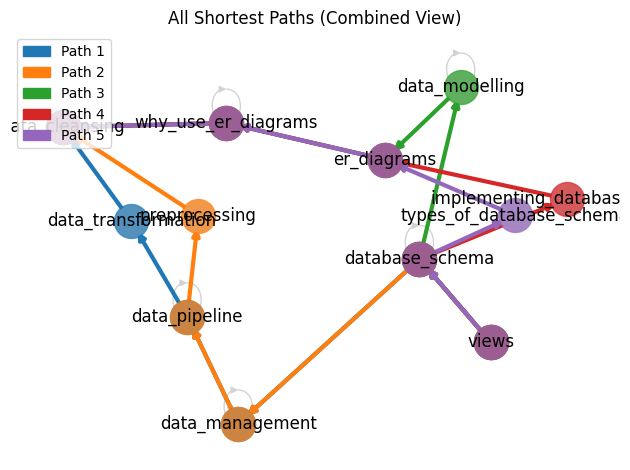

In [68]:
paths = find_all_shortest_paths(G, "views", "data_cleansing")

if paths:
    for path in paths:
        print(" → ".join(path))
    draw_all_paths(G, paths)

## Exploration 2: Communities

Detecting communities in your graph using Louvain method (via python-louvain) for community detection

Future: 
- Print summary stats: how many communities, their sizes.
- Add these communities as tags or metadata back into the JSON.
- Compare communities to your existing tags: do they align or reveal new groupings?
- Girvan–Newman?

In [44]:
import community  # from python-louvain
from collections import Counter

def detect_communities(G):
    G_undirected = G.to_undirected()
    partition = community.best_partition(G_undirected)
    nx.set_node_attributes(G_undirected, partition, "community")
    return partition, G_undirected

def plot_community(G, partition, community_id):
    selected_nodes = [node for node, comm in partition.items() if comm == community_id]
    subgraph = G.subgraph(selected_nodes)

    if not selected_nodes:
        print(f"No nodes found in community {community_id}.")
        return

    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(subgraph, seed=42)

    nx.draw_networkx_nodes(subgraph, pos, node_color="skyblue", node_size=500, alpha=0.9)
    nx.draw_networkx_edges(subgraph, pos, alpha=0.3)
    nx.draw_networkx_labels(subgraph, pos, font_size=9)

    plt.title(f"Community {community_id}")
    plt.axis("off")
    plt.tight_layout()
    plt.show()

In [45]:
partition, G_undirected = detect_communities(G)

In [46]:
# get the number of communities
num_communities = len(set(partition.values()))
print(f"Number of communities: {num_communities}")

Number of communities: 79


In [51]:
# Print summary of community sizes (sorted by size, descending)
community_sizes = Counter(partition.values())
print("Community Sizes (sorted by size):")
for cid, size in sorted(community_sizes.items(), key=lambda x: x[1], reverse=True):
    if size > 1:
        print(f"Community {cid}: {size} nodes")

Community Sizes (sorted by size):
Community 6: 131 nodes
Community 2: 100 nodes
Community 10: 93 nodes
Community 43: 82 nodes
Community 21: 68 nodes
Community 16: 60 nodes
Community 20: 52 nodes
Community 9: 51 nodes
Community 3: 41 nodes
Community 32: 27 nodes
Community 19: 16 nodes
Community 59: 5 nodes
Community 28: 2 nodes
Community 38: 2 nodes
Community 63: 2 nodes


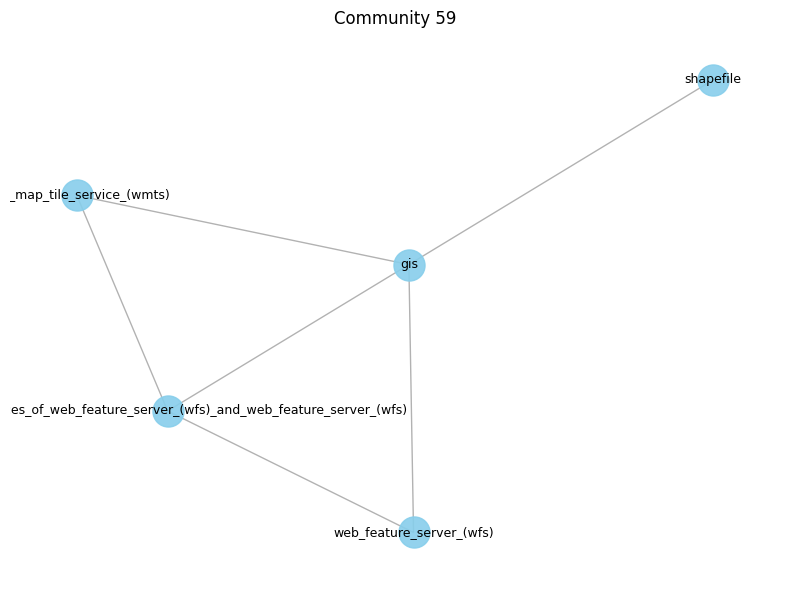

In [50]:
COMMUNITY_ID_TO_PLOT = 59  # Change this to explore different communities
# Plot one community
plot_community(G_undirected, partition, COMMUNITY_ID_TO_PLOT)

## Exploration 1: Node Roles

Identifying well-connected nodes.

Classifying nodes into roles (hubs, peripherals, isolated).

Generating visualizations:

Histogram of in-degree and out-degree.

Scatter plot of in-degree vs out-degree.

Detecting common 3-node paths (A → B → C).

In [14]:
# ---------------------------
# Node Connectivity Analysis
# ---------------------------
degree_data = []

for node in G.nodes:
    in_deg = G.in_degree(node)
    out_deg = G.out_degree(node)
    degree_data.append((node, in_deg, out_deg))

# Sort by in-degree or out-degree
sorted_by_in = sorted(degree_data, key=lambda x: x[1], reverse=True)
sorted_by_out = sorted(degree_data, key=lambda x: x[2], reverse=True)

In [15]:
print("\nTop 3 nodes by in-degree:")
for node, indeg, _ in sorted_by_in[:3]:
    print(f"  {node}: in-degree = {indeg}")


Top 3 nodes by in-degree:
  interpretability: in-degree = 29
  neural_network: in-degree = 25
  gradient_descent: in-degree = 23


In [16]:
print("\nTop 3 nodes by out-degree:")
for node, _, outdeg in sorted_by_out[:3]:
    print(f"  {node}: out-degree = {outdeg}")


Top 3 nodes by out-degree:
  ds_&_ml_portal: out-degree = 61
  machine_learning_algorithms: out-degree = 24
  statistics: out-degree = 21


In [ ]:
# Classify roles
roles = {}
for node, indeg, outdeg in degree_data:
    if indeg + outdeg == 0:
        roles[node] = "isolated"
    elif indeg >= 2 or outdeg >= 2:
        roles[node] = "hub"
    else:
        roles[node] = "peripheral"

print("\nNode roles:")
for node, role in roles.items():
    print(f"  {node}: {role}")

In [18]:
# ---------------------------
# Visualisation: Degree Metrics
# ---------------------------
in_degrees = [deg[1] for deg in degree_data]
out_degrees = [deg[2] for deg in degree_data]
labels = [deg[0] for deg in degree_data]

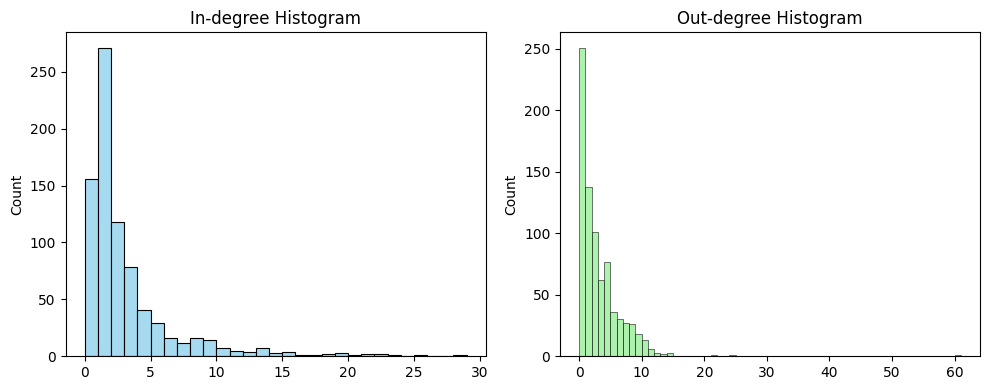

In [21]:
# Histogram
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(in_degrees, bins=range(0, max(in_degrees + [1]) + 1), color="skyblue")
plt.title("In-degree Histogram")

plt.subplot(1, 2, 2)
sns.histplot(out_degrees, bins=range(0, max(out_degrees + [1]) + 1), color="lightgreen")
plt.title("Out-degree Histogram")
plt.tight_layout()
plt.show()

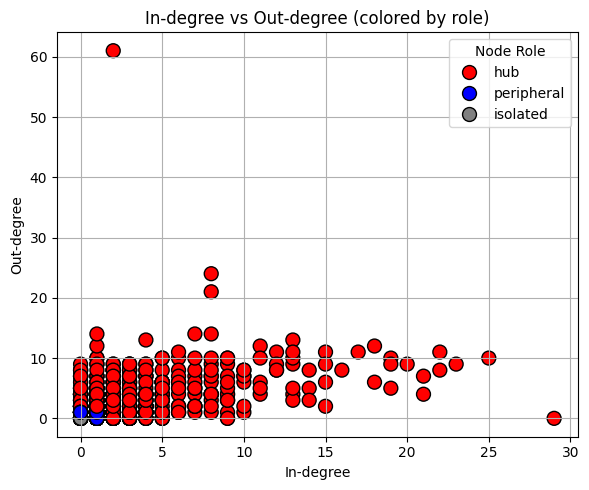

In [26]:
import matplotlib.pyplot as plt

# Role → color mapping
role_colors = {
    "hub": "red",
    "peripheral": "blue",
    "isolated": "gray"
}

# Extract data
x = [deg[1] for deg in degree_data]  # in-degree
y = [deg[2] for deg in degree_data]  # out-degree
labels = [deg[0] for deg in degree_data]
colors = [role_colors[roles[node]] for node in labels]

# Plot with color by role
plt.figure(figsize=(6, 5))
scatter = plt.scatter(x, y, c=colors, edgecolor='k', s=100)

# # Annotate points
# for i, label in enumerate(labels):
#     plt.text(x[i] + 0.05, y[i] + 0.05)

# Create legend manually
legend_handles = [
    plt.Line2D([0], [0], marker='o', color='w', label=role,
               markerfacecolor=color, markersize=10, markeredgecolor='k')
    for role, color in role_colors.items()
]
plt.legend(handles=legend_handles, title="Node Role")

plt.xlabel("In-degree")
plt.ylabel("Out-degree")
plt.title("In-degree vs Out-degree (colored by role)")
plt.grid(True)
plt.tight_layout()
plt.show()
